## See TOTAL_REVENUE, which includes total revenue data, and TOTAL_EXPENDITURE, which includes total spending data. Do these variables contain outliers?

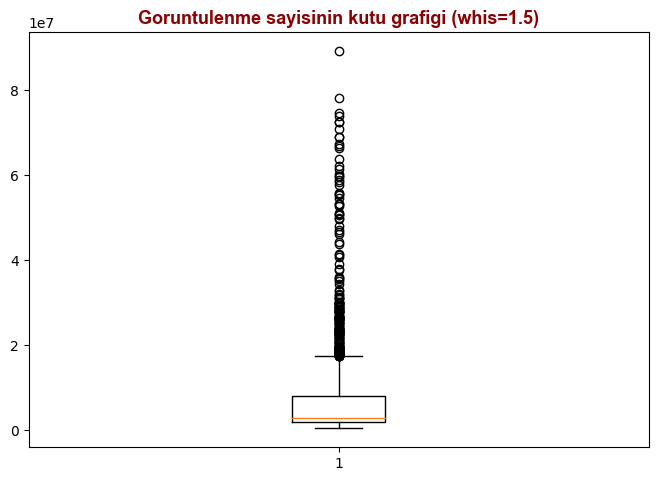

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['figure.dpi']=100
plt.rcParams['figure.figsize']=(8,5.5)
states_year=pd.read_csv('data/states_year.csv')

title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.boxplot(states_year['TOTAL_REVENUE'],)
plt.title("Goruntulenme sayisinin kutu grafigi (whis=1.5)",fontdict=title_font)
plt.show()

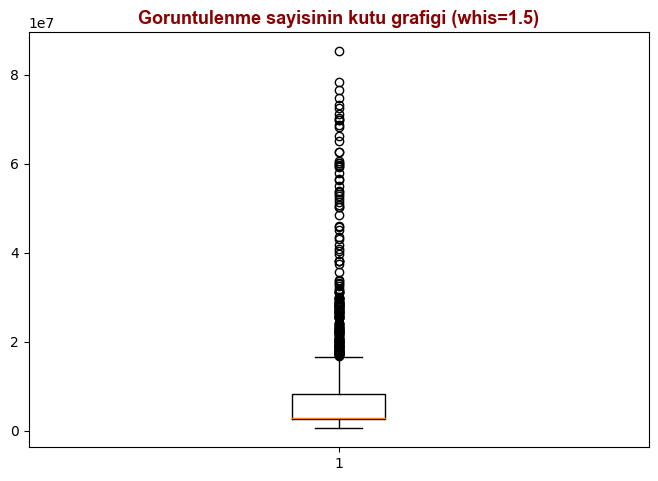

In [3]:
plt.boxplot(states_year['TOTAL_EXPENDITURE'],)
plt.title("Goruntulenme sayisinin kutu grafigi (whis=1.5)",fontdict=title_font)
plt.show()

## If you find outliers in the total income TOTAL_REVENUE and total expenditure TOTAL_EXPENDITURE variables, eliminate these outliers by applying the techniques you learned in this lesson and verify that no outliers remain after doing this.

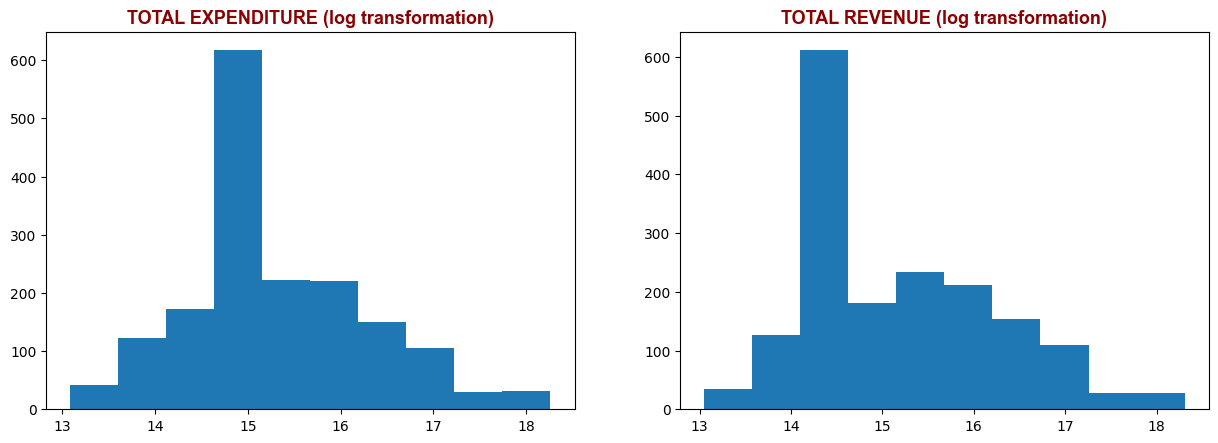

In [6]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(np.log(states_year['TOTAL_EXPENDITURE']))
plt.title("TOTAL EXPENDITURE (log transformation)", fontdict=title_font)

plt.subplot(1,2,2)
plt.hist(np.log(states_year['TOTAL_REVENUE']))
plt.title("TOTAL REVENUE (log transformation)", fontdict=title_font)
plt.show()

In [8]:
q75, q25 = np.percentile(states_year["TOTAL_EXPENDITURE"], [75 ,25])
iqr = q75 - q25

q75_log, q25_log = np.percentile(np.log(states_year["TOTAL_EXPENDITURE"]), [75 ,25])
iqr_log = q75_log - q25_log

log_treshold_values = pd.DataFrame(columns=['treshold_value', 'outlier_value_number', 'outlier_value_number_log'])

for treshold_value in np.arange(1,5,0.5):
    min_value_log = q25_log - (iqr_log*treshold_value) 
    maks_value_log = q75_log + (iqr_log*treshold_value)
    min_value = q25 - (iqr*treshold_value) #without log transformation
    maks_value = q75 + (iqr*treshold_value) #without log transformation
    
    outlier_value_number_log = len((np.where((np.log(states_year["TOTAL_EXPENDITURE"]) > maks_value_log)| (np.log(states_year["TOTAL_EXPENDITURE"]) < min_value_log))[0]))
    outlier_value_number = len((np.where((states_year["TOTAL_EXPENDITURE"] > maks_value)| (states_year["TOTAL_EXPENDITURE"] < min_value))[0]))
    log_treshold_values = log_treshold_values.append({'treshold_value': treshold_value,'outlier_value_number' : outlier_value_number, #without log transformation
    'outlier_value_number_log': outlier_value_number_log }, ignore_index=True)
log_treshold_values

,treshold_value,outlier_value_number,outlier_value_number_log
0,1.0,234.0,147.0
1,1.5,186.0,38.0
2,2.0,150.0,1.0
3,2.5,124.0,0.0
4,3.0,106.0,0.0
5,3.5,82.0,0.0
6,4.0,61.0,0.0
7,4.5,52.0,0.0


In [9]:
q75, q25 = np.percentile(states_year["TOTAL_REVENUE"], [75 ,25])
iqr = q75 - q25

q75_log, q25_log = np.percentile(np.log(states_year["TOTAL_REVENUE"]), [75 ,25])
iqr_log = q75_log - q25_log

log_treshold_values = pd.DataFrame(columns=['treshold_value', 'outlier_value_number', 'outlier_value_number_log'])

for treshold_value in np.arange(1,5,0.5):
    min_value_log = q25_log - (iqr_log*treshold_value) 
    maks_value_log = q75_log + (iqr_log*treshold_value)
    min_value = q25 - (iqr*treshold_value) #without log transformation
    maks_value = q75 + (iqr*treshold_value) #without log transformation
    
    outlier_value_number_log = len((np.where((np.log(states_year["TOTAL_REVENUE"]) > maks_value_log)| (np.log(states_year["TOTAL_REVENUE"]) < min_value_log))[0]))
    outlier_value_number = len((np.where((states_year["TOTAL_REVENUE"] > maks_value)| (states_year["TOTAL_REVENUE"] < min_value))[0]))
    log_treshold_values = log_treshold_values.append({'treshold_value': treshold_value,'outlier_value_number' : outlier_value_number, #without log transformation
    'outlier_value_number_log': outlier_value_number_log }, ignore_index=True)
log_treshold_values

,treshold_value,outlier_value_number,outlier_value_number_log
0,1.0,226.0,51.0
1,1.5,179.0,7.0
2,2.0,135.0,0.0
3,2.5,111.0,0.0
4,3.0,84.0,0.0
5,3.5,64.0,0.0
6,4.0,50.0,0.0
7,4.5,45.0,0.0


## Subtract the total expenditure TOTAL_EXPENDITURE from the total income variable TOTAL_REVENUE to create a variable that can be considered as a budget deficit (without failing to contradict the outliers). Are there any outliers in this new variable? If any, clear these outliers.

In [15]:
states_year['budget_deficit']=states_year["TOTAL_REVENUE"]-states_year["TOTAL_EXPENDITURE"]
states_year['budget_deficit']

q75, q25 = np.percentile(states_year["budget_deficit"], [75 ,25])
iqr = q75 - q25
treshold_values = pd.DataFrame(columns=['treshold_value', 'outlier_value_number'])

for treshold_value in np.arange(1,5,0.5):
    min_value = q25 - (iqr*treshold_value)
    maks_value = q75 + (iqr*treshold_value) 
    outlier_value_number = len((np.where((states_year["budget_deficit"] > maks_value)| (states_year["budget_deficit"] < min_value))[0]))
    treshold_values = treshold_values.append({'treshold_value': treshold_value,'outlier_value_number' : outlier_value_number}, ignore_index=True)
treshold_values

,treshold_value,outlier_value_number
0,1.0,77.0
1,1.5,47.0
2,2.0,29.0
3,2.5,20.0
4,3.0,13.0
5,3.5,12.0
6,4.0,9.0
7,4.5,7.0


In [16]:
q75_log, q25_log = np.percentile(np.log(states_year["budget_deficit"]), [75 ,25])
iqr_log = q75_log - q25_log

log_treshold_values = pd.DataFrame(columns=['treshold_value', 'outlier_value_number_log'])

for treshold_value in np.arange(1,5,0.5):
    min_value_log = q25_log - (iqr_log*treshold_value) 
    maks_value_log = q75_log + (iqr_log*treshold_value)
    outlier_value_number_log = len((np.where((np.log(states_year["budget_deficit"]) > maks_value_log)| (np.log(states_year["budget_deficit"]) < min_value_log))[0]))
    log_treshold_values = log_treshold_values.append({'treshold_value': treshold_value,'outlier_value_number_log': outlier_value_number_log }, ignore_index=True)
log_treshold_values

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,treshold_value,outlier_value_number_log
0,1.0,0.0
1,1.5,0.0
2,2.0,0.0
3,2.5,0.0
4,3.0,0.0
5,3.5,0.0
6,4.0,0.0
7,4.5,0.0


## Again create a variable that can be considered as a budget deficit by subtracting the total income TOTAL_REVENUE variable from the total expenditure TOTAL_EXPENDITURE. But this time, after clearing the outliers, do this. Are there any outliers in this new variable? It is useful to clean them, if any.

In [17]:
states_year['budget_deficit_log']=np.log(states_year["TOTAL_REVENUE"])-np.log(states_year["TOTAL_EXPENDITURE"])
states_year['budget_deficit_log']

0       0.009409
1       0.076298
2      -0.043102
3      -0.017982
4      -0.032918
          ...   
1710   -0.291650
1711   -0.291650
1712   -0.291650
1713   -0.291650
1714   -0.291650
Name: budget_deficit_log, Length: 1715, dtype: float64

In [18]:
q75, q25 = np.percentile(states_year["budget_deficit_log"], [75 ,25])
iqr = q75 - q25
treshold_values = pd.DataFrame(columns=['treshold_value', 'outlier_value_number'])

for treshold_value in np.arange(1,5,0.5):
    min_value = q25 - (iqr*treshold_value)
    maks_value = q75 + (iqr*treshold_value) 
    outlier_value_number = len((np.where((states_year["budget_deficit_log"] > maks_value)| (states_year["budget_deficit_log"] < min_value))[0]))
    treshold_values = treshold_values.append({'treshold_value': treshold_value,'outlier_value_number' : outlier_value_number}, ignore_index=True)
treshold_values

,treshold_value,outlier_value_number
0,1.0,1.0
1,1.5,0.0
2,2.0,0.0
3,2.5,0.0
4,3.0,0.0
5,3.5,0.0
6,4.0,0.0
7,4.5,0.0
